# MAST30032: Biological Modelling and Simulation

Author: Stephen Zhang


## Discrete-time models

Discrete-time models in general concern _difference equations_. We will focus on _first order_ difference equations, which describe sequences $\{x_n\}$ such that:

$$x_{n+1} \leftarrow f(x_n)$$

The function $f(\cdot)$ is called the _map_.

### Solution of first-order linear difference equations

Consider an equation with the general form

$$x_{n+1} = ax_n + P(x), a \in \mathbb{R}$$

We rewrite this as $x_{n+1} - ax_n = P(n)$, then split into _homogeneous_ and _inhomogeneous_ equations:
\begin{align}
    x_{n+1} - ax_n &= 0 \quad &\text{homogeneous}\\
    x_{n+1} - ax_n &= P(n) \quad &\text{inhomogeneous}\\
\end{align}

A simple solution (verify this) of the homogeneous solution is ${x_n}^h = Ca^n$. We need to **guess** some $Q(n)$, a solution to the inhomogeneous equation.

The **overall** solution is given by superposition:

$$x_n = {x_n}^h + {x_n}^i = Ca^n + Q(n)$$

### Behaviour of systems of the form $x_{n+1} = rx_n$

Consider the case $x_{n+1} = rx_n$ which has solution $x_n = r^tx_0$. There are **seven** classes

1. $r = 0$: solution is zero except possibly $x_0$
2. $r = 1$: solution is constant everywhere
3. $r = -1$: solution oscillates between $+x_0$ and $-x_0$
4. $r \in (0, 1)$: $x_n \to 0$ as $n \to \infty$ monotonically
5. $r \in (-1, 0)$: $x_n \to 0$ as $n \to \infty$ by bounded oscillation
6. $r > 1$: $x_n \to \infty$ as $n \to \infty$ monotonically
7. $r < -1$: $|x_n| \to \infty$ as $n \to \infty$ and $x_n$ oscillates unboundedly

### Analysis by cobwebbing

Cobwebbing is a graphical method for determining the long-term behaviour of a discrete dynamical system. Consider the general case $x_{n+1} = f(x_n)$. Fixed points of our system are solutions of $x = f(x)$.

That is, they will be the intersection between the graph of $y = f(x)$ and $y = x$.

![Cobweb of $y = \sqrt{x}$ , $x_0 = 0.6$](cobweb1.png)

Here, we see the cobweb of $x_{n+1} = \sqrt{x}$ starting from $x_0 = 0.6$. Observe that we converge towards $x = 1$, one of the fixed points of our dynamical system. We call $x = 1$ **stable**, because starting from $x = 0.6$ results in attraction to $x = 1$. On the other hand, $x = 0$ is an **unstable** fixed point, since starting close to $x = 0$ will result in repulsion (see below).

![](cobweb2.png)

Cobwebbing can show us situations that result in oscillatory behaviour around a fixed point, such as when $f(x) = 1-0.5x^2$ and $x_0 = 0.91$:

![](cobweb3.png)

The results observed from cobwebbing are formalised as _linear stability analysis_.

### General linear stability analysis

Consider the dynamical system described by:

$$u_{t+1} = f(u_t ; r)$$

Here, $r$ is some parameter in the model (its importance will show later!)

Let us first determine the _stable (fixed) points_ of our system - such points are solutions to the equation $u = f(u; r)$. Let $u^*$ be such a stable point.

Clearly, if $u_0 = u^*$ then $u_t = u^*$ everywhere. This is not interesting - we want to know about the behaviour of our system _close_ to $u^*$. Let us thus consider some perturbation $\delta_n$ away from our fixed point - we would like to know the _fate_ of this perturbation as it propagates with the evolution of time in our system.

Consider using the Taylor series expansion:

\begin{align}
    u^* + \delta_{n+1} &= f(u^* + \delta_n; r)\\
    &= f(u^*) + \delta_nf'(u^*) + \mathcal{O}(\delta_n^2)
\end{align}

Since $\delta_n \ll 1$, we have

$$u^* + \delta_{n+1} = \underbrace{(u^*)}_{ = u^*} + \delta_nf'(u^*)$$

Thus

$$\delta_{n+1} = f'(u^*)\delta_n$$

*** Eigenvalues of steady states***

We call $\lambda = f'(u^*)$ the _eigenvalue_ of the system associated with the steady state $u^*$.

Clearly, if $|\lambda| < 1$, then $\delta_{n} \to 0$ as $n \to \infty$; that is, $u^*$ is said to be stable.
* Specifically, if $-1 < \lambda < 0$, we obtain _oscillatory_ behaviour.

Consider the case $\lambda = \pm 1$. This corresponds to the points in our parameter space where the nature of our steady state *changes*.

Consider the **quadratic map** specified by $f(x) = rx(1-x)$.

Solving for steady states, we obtain:
\begin{align*}
    x^*_1 &= 0\\
    x^*_2 &= 1 - \dfrac{1}{r}\\
\end{align*}

Compute the derivative at these points using $f'(x) = r\left( 1-x\right) -rx$

\begin{align*}
    f'(x^*_1) &= r\\
    f'(x^*_2) &= 2-r
\end{align*}

$x^*_1 = 0$ is stable for $|r| < 1$. $x^*_2 = 1 - 1/r$ is stable for $1<r<3$. We can thus plot the **stable** solutions to our system as a function of $r$.


Text(0.5,1,'Plot of stable fixed points for map $f(x) = rx(1-x)$ for $r \\in [0, 3]$')

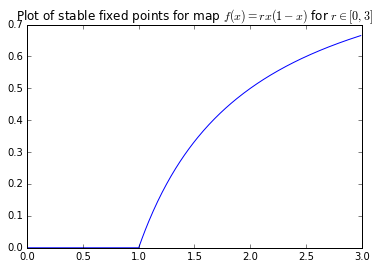

In [10]:
import matplotlib as mp
import matplotlib.pyplot as plt
plt.figure()
x = [0.01*i for i in range(0, 300)]
y = [0 for i in range(0, 100)] + [1 - 1/(0.01*i) for i in range(100, 300)]
plt.plot(x, y)
plt.title("Plot of stable fixed points for map $f(x) = rx(1-x)$ for $r \in [0, 3]$")

Text(0.5,1,'Plot of iterative solution with r = 3.1')

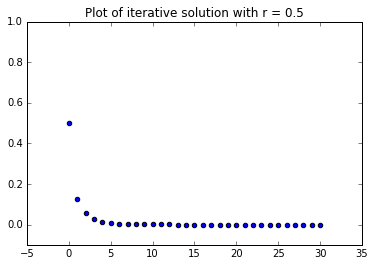

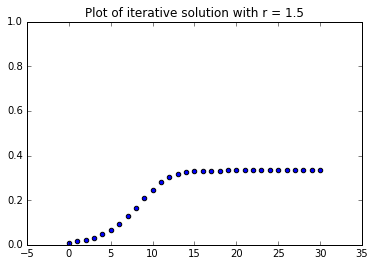

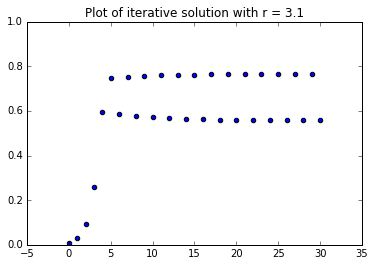

In [38]:
from iterate import iterate
r = 0.5
x = iterate(30, lambda x: r*x*(1-x), x0 = 0.5)

plt.figure()
plt.scatter([i[0] for i in x], [i[1] for i in x])
plt.title("Plot of iterative solution with r = 0.5")
plt.ylim(-0.1, 1)

r = 1.5
x = iterate(30, lambda x: r*x*(1-x), x0 = 0.01)
plt.figure()
plt.scatter([i[0] for i in x], [i[1] for i in x])
plt.ylim(0, 1)
plt.title("Plot of iterative solution with r = 1.5")

r = 3.1
x = iterate(30, lambda x: r*x*(1-x), x0 = 0.01)
plt.figure()
plt.scatter([i[0] for i in x], [i[1] for i in x])
plt.ylim(0, 1)
plt.title("Plot of iterative solution with r = 3.1")

In the last case where $r = 3.1$, we see that our steady state is a **2-cycle** that alternates between 2 values. We say that $r$ increased past the bifurcation point $r = 3$.

How does this arise?

For $r > 3$, consider some fixed point of our map, $u^* = f(u^*)$. Clearly, $u^* = f(f(u^*))$. That is,

$$u^* = f^2(u^*)$$

We can consider solutions to the second-iterate map.

$$r^2(1-u^*)u^*(1-r(1-u^*)u^*) = u^*$$

We can attempt to solve this equation and recover the solutions:
\begin{align*}
    u^* &= 0 &\text{for } |r| < 1\\
    u^* &= 1 - 1/r &\text{for } 1 < r < 3\\
    u^* &= \alpha, \beta &\text{for } r > 3
\end{align*}

We can now consider stability under the second-iterate map $f^2$, so we consider $\mathrm{d}_x f^2$ at our fixed points to determine where they are stable.

Following on from this, we may consider the next iteration of our map, $f^3$, and so on.

In general, to investigate the stability of specific points on our map, we may consider:

$$u^* = f^m(u^*) \Rightarrow \lambda = \dfrac{\partial f^m}{\partial u}(u^*) = \Pi_{i = 0}^{m-1} f'(u_i)$$

### Systems of difference equations

Definition: a *k*th order discrete system of difference equations is described by an expression of the form:

$$X_{t+k} = f(X_{t+k-1}, X_{t+k-2}, ..., X_t ; t)$$

#### 'Reduction of order' for systems of difference equations

A system of order $k > 1$ can be reduced to a first order system by augmenting the number of variables:

Consider

$$y_{t+2} = g(y_{t+1}, y_t)$$

We set $u_t = y_{t+1}$ and $v_t = y_t$. This gives:

\begin{align*}
    u_{t+1} &= g(u_t, v_t)\\
    v_{t+1} &= u_t
\end{align*}

This is a *first order* system that can be solving methods we will presently show.

#### Analysis of linear systems of difference equations

A linear system of difference equations can be expressed in the form

$$\vec{x}_{n+1} = \mathbf{A}\vec{x}_n + \vec{c}$$

Where $\vec{x}_n = (x_{1,n}, x_{2,n}, ..., x_{m, n})$ and $\mathbf{A}$ is a matrix of constants, $\vec{c}$ is a vector of constants.

Consider a certain solution where $\vec{x}$ takes the form $\vec{x}_n = (A\lambda^n, B\lambda^n) = \lambda^n \vec{x}_0$. Thus we achieve the following:

\begin{align*}
\lambda^{n+1}\vec{x}_0 &= \mathbf{A} \lambda^n \vec{x}_0\\
(\mathbf{A} - \lambda \mathbf{I}) \vec{x}_0 &= \mathbf{0}
\end{align*}

Clearly in this situation, $\vec{x}_0 \ne \vec{0}$ in general so we require $\mathrm{det}(\mathbf{A} - \lambda\mathbf{I}) = 0$, i.e. $\lambda$ must be an **eigenvalue** of $\mathbf{A}$.

Consequently for our system to undergo the behaviour $\vec{x}_{n+1} = \lambda \vec{x}_n$, $\vec{x}_0$ must be *an eigenvector* corresponding to the eigenvalue $\lambda$.

Our solution will converge $\vec{x}_n \to \vec{0}$ if $|\lambda| < 1$, and diverge if $|\lambda| > 1$.

***What happens in the general case where $\vec{x}_0$ is a general vector?***

Assuming $\mathbf{A}$ is nonsingular ($\Rightarrow$ $\mathbf{A}$ is of full rank), the rank-nullity theorem implies it will have a 'non-degenerate eigenspace'.

Thus, for any $\vec{x}_n$ we may write an expansion in basis vectors:

$$\vec{x}_n = \sum_i k_i \vec{e}_i$$

Thus

$$\vec{x}_{n+1} = \mathbf{A}\vec{x}_n = \mathbf{A}\sum_i k_i\vec{e}_i = \sum_i \lambda_ik_i\vec{e}_i$$

From this it is clear that:

* To ensure that $\vec{x}_n \to \vec{0}$, $|\lambda_i| < 1$ for **all** our eigenvalues.
* If **one** of our eigenvalues is $>1$, one of our eigenvector expansion terms will explode.

#### Nonlinear systems

We can consider the most general case of our problem:

\begin{equation}
\begin{bmatrix}x_{n+1}\\y_{n+1}\end{bmatrix} = \begin{bmatrix}f(x_n, y_n)\\g(x_n, y_n)\end{bmatrix} \Rightarrow \vec{x}_{n+1} = \mathbf{F}(\vec{x}_n)
\end{equation}

Consider some fixed point $\vec{x}^*$ of our system, and take some small perturbation $\vec{delta}_n$ with $|\vec{\delta}_n| \ll 1$

As with univariate linear stability analysis, we can consider the behaviour of our system around the stable state.

\begin{align*}
    \vec{x}^* + \vec{\delta}_{n+1} &= \mathbf{F}(\vec{x}^* + \vec{\delta}_n)\\
    \vec{x}^* + \vec{\delta}_{n+1} &= \vec{x}^* + \mathbf{DF}(\vec{x}^*) + \vec{e}
\end{align*}

Here, $\mathbf{DF}$ is the derivative matrix

\begin{equation}
\mathbf{DF} = \begin{bmatrix}f_x&f_y\\g_x&g_y\end{bmatrix}
\end{equation}